# **Project Name**    -  Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -** Amrit Roy


# **Project Summary -**

* Hotel Bookings Analysis project consists with the real - world data record of hotel bookings of a city hotel and a resort hotel for the period 2015 - 2017 respectively. The project data record consists of information such as type of hotel booked, average daily rate, booking details, arrival date, length of the stay, the number of adults, children, and / or babies booked, customer country, meal preferences, type of the customer, parking space details, reservation status, channels used for booking, booking cancellation details, booking lead time details. In this dataset contains total rows 119390 and 32 columns.. Data analysis and data visualization will be performed using Python libraries.

* As we further moved we find unique value of each columns and generate a list in tabular form and also check the dataset type of each columns’ find some columns not in accurate data types which correct it later done in Data cleaning part and as well as duplicates data items must be removed as we find duplicates items equal to 87396 which is dropped from dataset later.

* Before visualize any data from the data set we have to do data wrangling. For that, we are checked the null value of all the columns. After checking, when we are getting a column which has more number of null values, dropped that column by using the 'drop' method. In this way, we are dropped the 'company' column. When we are find minimal number of null values, filling thse null values with necesary values as per requirement by using .fillna()

# **GitHub Link -**

GitHub Link here : https://github.com/er-amritroy/Hotel-Booking-EDA

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.

#### **Define Your Business Objective?**

* To know the most preferred type of meal by customers
* To know The Percentage of bookings in each hotel
* To know which hotel is making more revenue
* To find the most preferred length of stay in each hotel
* To know the most preferred distribution channel for bookings
* To know which distribution channel has highest cancellation percentage
* To understand the effect of total stay on average daily revenue
* Find top 10 countrys guest is comming
* Find which agent have maximum no of booking
* Find which month has maximum number of bookig
* Which type of hotel has longer waiting time
* Find which type of hotel is preferred by guest for revisit 
* understand the correlation between the variables.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Link : https://drive.google.com/file/d/188qBir1dXr2buX3LijVChOGMms1bday1/view?usp=share_link

In [ ]:
# Load Dataset
hotel_booking_df = pd.read_csv('/content/drive/MyDrive/Hotel Booking EDA/Hotel Bookings.csv')


### Dataset First View

In [ ]:
# Dataset First Look
hotel_booking_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, column = hotel_booking_df.shape
print('Total Rows in Dataset :', rows)
print('Total Columns in Dataset :', column)

Total Rows in Dataset : 119390
Total Columns in Dataset : 32


### Dataset Information

In [ ]:
# Dataset Info
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# To know the duplicates value, we use .duplicated() function
hotel_booking_df.duplicated().sum()

31994

* So in this dataset there are 31994 rows are duplicate, we will remove this later

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# To identify the missing values, we use isna()/isnull() function
hotel_booking_df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

* So here we see that there are some missing values in `children`, `country`, `agent` and `company` columns, we remove this later.

### What did you know about your dataset?

This data set contains a single file which compares various booking information about two hotels, a city hotel and a resort hotel. includes information such as:
* Guest Demographics : `country`, `adults`, `children`, `babies`.
* Arrival Information : `arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month`.
* Reservation Status : `reservation_status`, `reservation_status_date`, `is_canceled`, `lead_time`, `days_in_waiting_list`.
* User Actions : `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`.
* Accommodation Details :`stays_in_weekend_nights`, `stays_in_week_nights`, `reserved_room_type`, `assigned_room_type`, `meals`, `required_car_parking_spaces`, `total_of_special_requests`.
* Booking Information :`hotel, market_segment`, `distribution_channel`, `booking_changes`, `deposit_type`, `agent`, `company`, `customer_type`.
* Average Daily Rate : ` adr.`

The dataset contains a total of 119390 rows and 32 columns. Dataset Contains duplicated values of 31944 which is removed later, and there are also some missing values in  children, country, agent and company columns, we remove this later. In this dataset we find data types of every columns i.e (Int, float ,string) and observe that some columns data types is not accurate and remove later.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
#getting the overall statistics summary for all numerical columns, we use describe() function
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 

- 1. `hotel` : Name of the hotel (Resort Hotel or City Hotel)

- 2. `is_canceled` : If the booking was canceled (1) or not (0)

- 3. `lead_time`: Number of days before the actual arrival of the guests

- 4. `arrival_date_year` : Year of arrival date

- 5. `arrival_date_month` : Month of month arrival date

- 6. `arrival_date_week_number` : Week number of year for arrival date

- 7. `arrival_date_day_of_month` : Day of arrival date

- 8. `stays_in_weekend_nights` : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

- 9. `stays_in_week_nights` : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

- 10. `adults` : Number of adults among guests

- 11. `children` : Number of children among guests

- 12. `babies` : Number of babies among guests

- 13. `meal` : Type of meal booked

- 14. `country` : Country of guests

- 15. `market_segment` : Designation of market segment

- 16. `distribution_channel` : Name of booking distribution channel

- 17. `is_repeated_guest` : If the booking was from a repeated guest (1) or not (0)

- 18. `previous_cancellations` : Number of previous bookings that were cancelled by the customer prior to the current booking

- 19. `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking

- 20. `reserved_room_type` : Code of room type reserved

- 21. `assigned_room_type` : Code of room type assigned

- 22. `booking_changes` : Number of changes/amendments made to the booking

- 23. `deposit_type` : Type of the deposit made by the guest

- 24. `agent` : ID of travel agent who made the booking

- 25. `company` : ID of the company that made the booking

- 26. `days_in_waiting_list` : Number of days the booking was in the waiting list

- 27. `customer_type` : Type of customer, assuming one of four categories

- 28. `adr` : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

- 29. `required_car_parking_spaces` : Number of car parking spaces required by the customer

- 30. `total_of_special_requests` : Number of special requests made by the customer

- 31. `reservation_status` : Reservation status (Canceled, Check-Out or No-Show)

- 32. `reservation_status_date` : Date at which the last reservation status was updated

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({i: hotel_booking_df[i].unique() for i in hotel_booking_df}) #Using a dictionary comprehension with unique:

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***

### Data Wrangling Code

* Data Cleaning

In [ ]:
# Lets copy our dataset for keep our original data as at is,
df = hotel_booking_df.copy()

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Check duplicates rows
df.duplicated().sum()

31994

In [ ]:
# To remove these values, we use function drop.duplicate to delete duplicate rows.
df.drop_duplicates(inplace = True)

# total rows = 119390, Duplicate Rows = 31994
unique_num_of_rows = df.shape[0]

unique_num_of_rows # now unique rows = 87396

87396

In [ ]:
# let's check which colomns has null value
nan_value = df.isna().sum().sort_values(ascending=False)
nan_value[:4]

company     82137
agent       12193
country       452
children        4
dtype: int64

In [ ]:
#lets check, what is the percentage of null value in each column, starting from company
company_null_percentage = nan_value[0]/unique_num_of_rows*100
company_null_percentage

93.98256213098998

In [ ]:
# So here we can see that almost 94% value is missing in company column, so it is better to drop the column 'company'
df.drop(['company'], axis=1, inplace=True)

In [ ]:
# Now lets check for `agent` column
agent_null_percentage = nan_value[1]/unique_num_of_rows*100
agent_null_percentage

13.951439425145315

In [ ]:
# As we have seen, there is about 14% null values in agent, Lets fill these value by 0 of this column
df['agent'].fillna(value=0, inplace=True) # fill missing value using fillna() method
df['agent'].isna().sum() # we re-check that column has no null value

0

In [ ]:
# Now lets check for `country` column
country_null_percentage = nan_value[2]/unique_num_of_rows*100
country_null_percentage

0.5171861412421621

In [ ]:
# We have less null values in country column, so we will replace null from 'other' as country name.
df['country'].fillna(value='other', inplace=True)

# we re-check that column has no null value
df['country'].isna().sum()

0

In [ ]:
# Now lets check for `children` column
children_null_percentage = nan_value[3]/unique_num_of_rows*100
children_null_percentage

0.004576868506567806

In [ ]:
# so here we see very less null values in children col, so we will replace null values by 0.

df['children'].fillna(value = 0, inplace = True)

# we re-check that column has no null value
df['children'].isnull().sum()

0

In [ ]:
#let's check whether database having any other null value

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

*  here we can seen, there are no null values in our dataset.

### Handling Outlier in column `adr`

<AxesSubplot:>

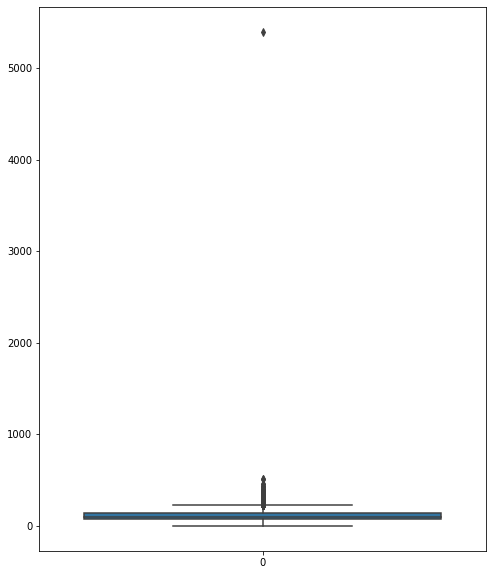

In [ ]:
# Plotting a boxplot to find out the outliers
fig, axes=plt.subplots(figsize=(8,10))
sns.boxplot(data=df['adr'],orient='v')

In [ ]:
# Handling Outlier Using IQR method
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)

# Inter Quartile Range
IQR = Q3 - Q1

#upper_limit and lower_limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [ ]:
# Handle and fixed the outlier by using IQR and capping method
df['adr'] = np.where(df['adr']>upper_limit, upper_limit,
                     np.where(df['adr']<lower_limit, lower_limit,
                              df['adr']))

<AxesSubplot:>

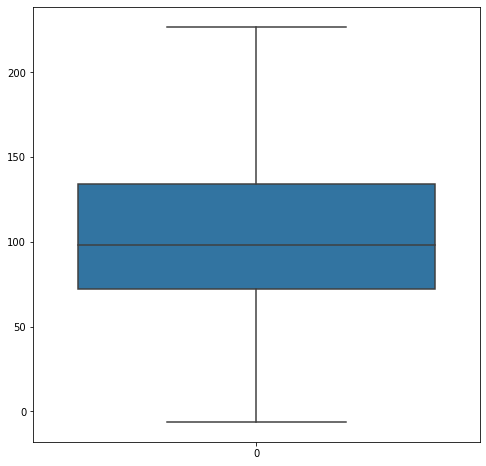

In [ ]:
fig, axes=plt.subplots(figsize=(8,8))
sns.boxplot(data=df['adr'],orient='v')

* So here we can see that there are no outlier present in `adr` column

### Data Manipulation

In [ ]:
# using the info of the data to check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
# We have seen that childer & agent column as datatype as float whereas it contains only int value, lets change datatype as 'int64'
df[['children', 'agent']] = df[['children', 'agent']].astype('int64')

In [ ]:
# Changing the datatype of 'reservation_status_date' to datatype of year-month-date
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
# Adding 'stays_in_weekend_nights' & 'stays_in_week_nights' column to get total_stay duration
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [ ]:
# Adding 'adults', 'children' & 'babies' column to get total_guest
df['total_guest'] = df['adults'] + df['children'] + df['babies']

In [ ]:
# We have created a col for revenue using total stay * adr
df['revenue'] = df['total_stay'] * df['adr']

### What all manipulations have you done and insights you found?

* Fisrt we create a copy of our dataset to keep our dataset as at is
* Check duplicates rows, found that `31994` rows are duplicate, so we removed these values using `drop.duplicated()` function.
* Check which column has null values, and found that `company` is 93%, `agent` 13%, `country` 0.51% and `children` 0.004 % null values are present.
  
  * Almost `94%` value is missing in company column, so it is better to drop the column `company`
  * Almost 14% null values in `agent` column, Lets fill these value by `0` of this column
  *  We have less null values (0.51%) in `country` column, so we will replace null from `other` as country name.
  * so here we see very less null values (0.004%) in `children` col, so we will replace null values by 0.

* Plotting a boxplot to find out the outliers, found that `adr` column has outlier.
  * Handle and fixed the outlier by using IQR and capping method (np.where).

* Data Manipulation :
  * Childer & agent column as datatype as float whereas it contains only int value, so we change datatype as 'int64'
  * Changing the datatype of 'reservation_status_date' to datatype of year-month-date
  * Adding `stays_in_weekend_nights` & `stays_in_week_nights` column to get `total_stay` duration
  * Adding `adults`, `children` & `babies` column to get `total_guest`
  * We have created a col for `revenue` using `total_stay` * `adr`

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1: Barplot
  * To know the most preferred type of meal by customers

Text(0, 0.5, 'No. of People')

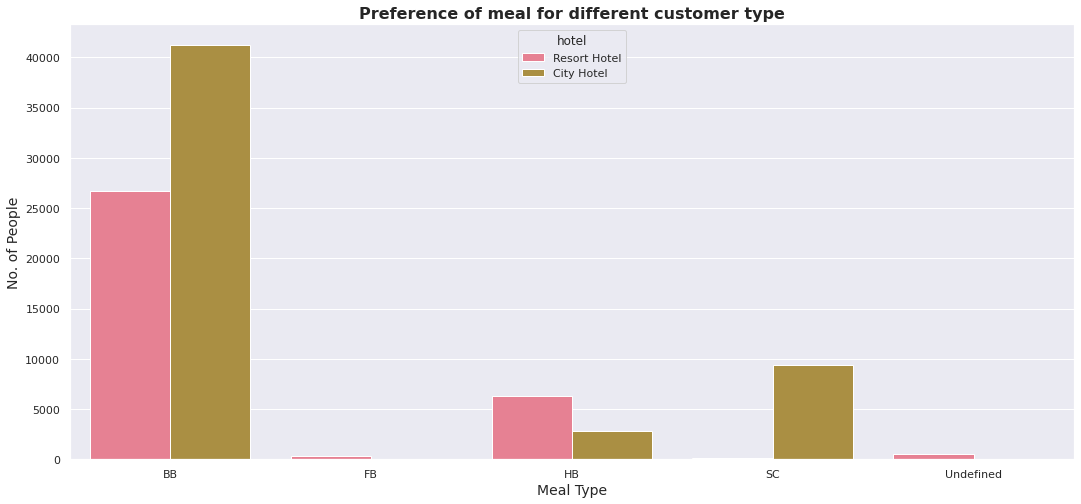

In [ ]:
# Chart - 1 visualization code
sns.set(rc={'figure.figsize':(18,8)})
sns.set_palette("husl")
graph = sns.countplot(x="meal",hue='hotel', data=df)
graph.set_title('Preference of meal for different customer type',fontsize = 16, fontweight='bold')
graph.set_xlabel('Meal Type',fontsize = 14)
graph.set_ylabel('No. of People',fontsize = 14)

##### 1. Why did you pick the specific chart?

As it is Univariate analysis, which is to identify from one variable or one column. we have choosed bar graph.

##### 2. What is/are the insight(s) found from the chart?

Bread & Breakfast (BB) is the most preferred meal by the customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As most customers prefer Bread & Breakfast (BB), the hotel management can introduce offers on Full Board (FB) meal, which can increase revenue as well.

#### Chart2 : Pie Chart
  * To know The Percentage of bookings in each hotel

([<matplotlib.patches.Wedge at 0x7f8018ec2100>,
 [Text(-1.0334002052130253, -0.3769403346229713, 'City Hotel'),
  Text(1.1085566216323381, 0.4043540733504457, 'Resort Hotel')],
 [Text(-0.5636728392071046, -0.20560381888525703, '61.1%'),
  Text(0.6388292395847371, 0.23301760159178225, '38.9%')])

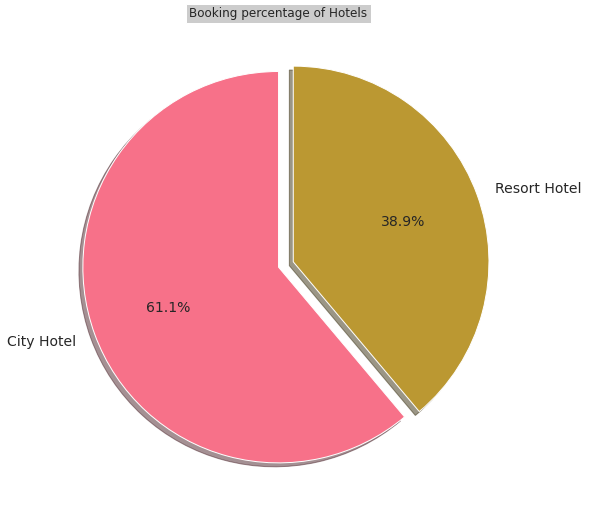

In [ ]:
# Chart - 2 visualization code
# Univariate Analysis
plt.rcParams['figure.figsize'] = 12,9
labels = df['hotel'].value_counts().index.tolist()      # Create labels -> ['City Hotel', 'Resort Hotel']
x = df['hotel'].value_counts().tolist()              # counts of each hotel -> [53428, 33968]
plt.title('Booking percentage of Hotels',bbox={'facecolor':'0.8', 'pad':3})
plt.pie(x, explode=(0, 0.08), labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14},shadow=True)

##### 1. Why did you pick the specific chart?

As this is a Univariate Analysis, we compare the data from one variable or one column 'hotel', so we have considered pie chart.

##### 2. What is/are the insight(s) found from the chart?

We found that the booking number is Higher in City Hotel which is 61.1% than Resort Hotel which is 38.9%. Hence we can say that City hotel has more consumption.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

`City Hotel` :- Provided more services to attract more guest to increase more revenue.

`Resort Hotel` :- Find solution to attract guest and find what city hotel did to attract guest.

#### Chart3 : Barplot
  * To know which hotel is making more revenue

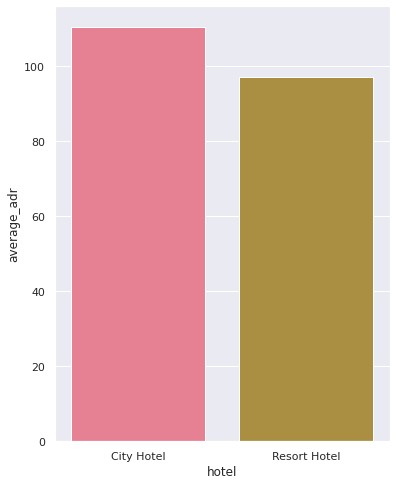

In [ ]:
# Chart - 3 visualization code
# Bivariate Analysis
grouped_by_hotel = df.groupby('hotel')   # did groupby on hotel
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'average_adr'})  # calculating average adr hotel wise
plt.figure(figsize = (6,8))
sns.barplot(x = d3['hotel'], y = d3['average_adr'])
plt.show()

##### 1. Why did you pick the specific chart?

As we are analysing hotel and adr variables, to know which hotel is making more revenue, we have choosed bar graph.

##### 2. What is/are the insight(s) found from the chart?

City Hotel is making more revenue than the Resort Hotel, which can be depicted as the City Hotel has significantly more bookings than the Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above bar graph, City Hotel is making more revenue than the Resort Hotel. The Resort Hotel management may consider to give complimentary meals and combo packages (adventure packages, tourism packages) to attract more customers and to increase hotel bookings, which increases revenue to the hotel.

#### Chart - 4
  * To find the most preferred length of stay in each hotel

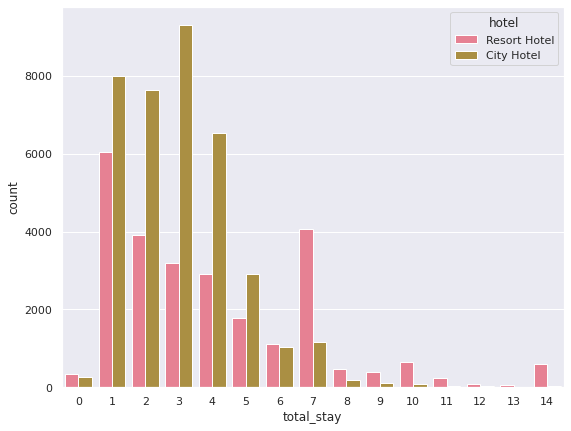

In [ ]:
# Chart - 4 visualization code
# Bivariate Analysis
not_canceled = df[df['is_canceled'] == 0]     # it gives us non canceled booking
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (9,7))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

##### 1. Why did you pick the specific chart?

As this analysis is a Bivariate Analysis, we considered bar graph in order to visualize the most preferred stay in each hotel respectively.

##### 2. What is/are the insight(s) found from the chart?

From the above bar graph, we can see that most preferred stay is 3 days. Most of the customers prefer City Hotel for shorter stay and Resort Hotel for longer stays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As customers are preferring Resort Hotel for longer stay, hotel management can introduce free gift coupons, loyalty service, complimentary services and combo tourism packages for nearby places in order to make customers redundent, which will increase revenue as well.

#### Chart - 5
  * To know the most preferred distribution channel for bookings

In [ ]:
dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((dc.size() / df.shape[0]) * 100,2)).reset_index().rename(columns = {0: 'Booking_%'})
d1

,distribution_channel,Booking_%
0,Corporate,5.81
1,Direct,14.86
2,GDS,0.21
3,TA/TO,79.11
4,Undefined,0.01


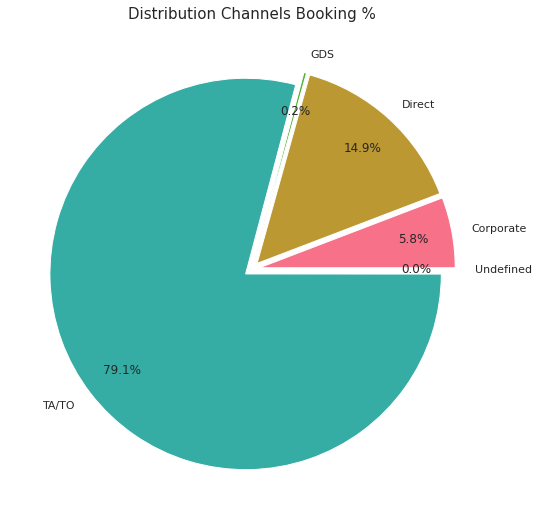

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (9,9))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x = data, autopct = "%1.1f%%", explode=[0.04] * 5, labels = labels, pctdistance = 0.8)
plt.title("Distribution Channels Booking %", fontsize = 15);

##### 1. Why did you pick the specific chart?

We are analysing the most preferred distribution channes for hotel bookings, which most of the customers used with the help of pie chart. As pie chart gives detailed information, we have choosen pie chart

##### 2. What is/are the insight(s) found from the chart?

79% of the customers has choosen Travel Agent / Tour Operator (TA/TO) for hotel booking, followed by direct bookings and corporate are 15% and 6%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The hotel management can offer discounts, complimentary services and offers on direct bookings as the hotel doesn’t pay commissions to third parties and maintains a direct relationship with the customer when a customer books the hotel directly

#### Chart - 6
  * To know which distribution channel has highest cancellation percentage

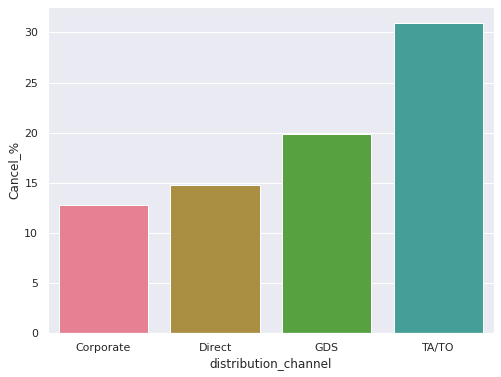

In [ ]:
# Chart - 6 visualization code
# Univariate Analysis
d1 = pd.DataFrame((dc['is_canceled'].sum() / dc.size()) * 100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (8,6))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

##### 1. Why did you pick the specific chart?

We have choosen bar graph as we are using single variable to understand which distribution channel has highest booking cancellation percentage.

##### 2. What is/are the insight(s) found from the chart?

Travel Agent / Tour Operator (TA/TO) has the highest booking cancellation percentage.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As TA/TO has highest number of booking cancellations of around 30%, the hotel management may introduce offers for direct bookings in order to reduce cancellations and increase direct bookings.

#### Chart - 7
  *  which room type is in most demand and which room type generate the highest adr

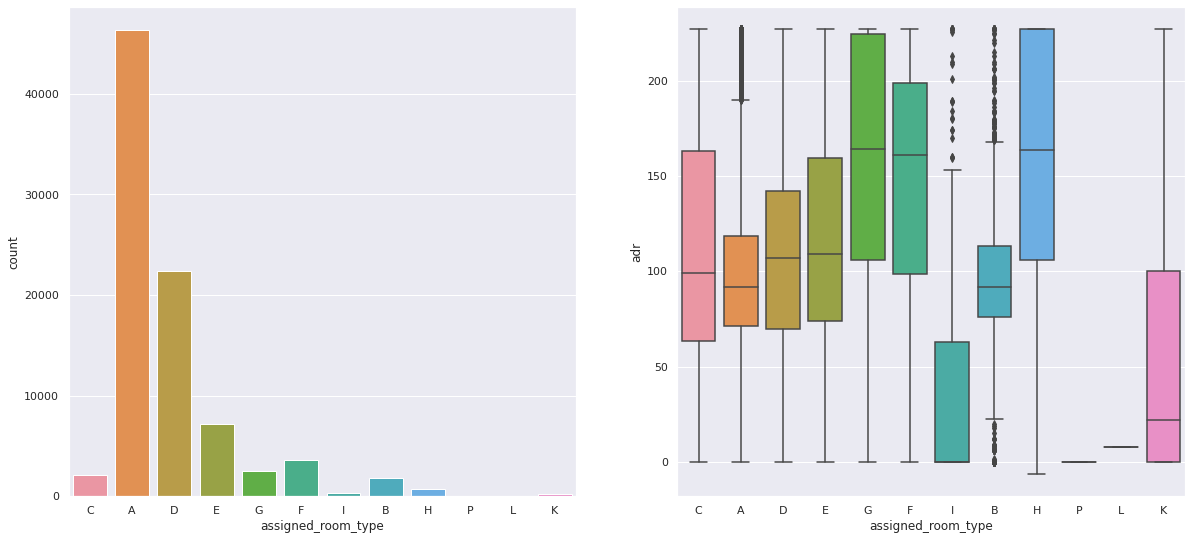

In [ ]:
# Chart - 7 visualization code

# To identify which room type is in most demand and which room type generate the highest adr.
fig, axes = plt.subplots(1, 2, figsize = (20, 9))
room = df.groupby('assigned_room_type')
d1['Num_of_bookings'] = room.size()
sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'])
plt.show()

##### 1. Why did you pick the specific chart?

As we are performing Multivariate Analysis to identify which room type is in most demand and which room type generate the highest adr, we have choosed bar graph and boxplot to understand better.

##### 2. What is/are the insight(s) found from the chart?

From the above graphs, we ca identofy that roomtype A is the most demanded rooms by the customer while booking, whereas room types H,G,C are generating more adr respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel management sholud consider to increase room types A, H in order to ger more revenue and increase adr respectively.

#### Chart - 8
  * To understand the effect of total stay on adr

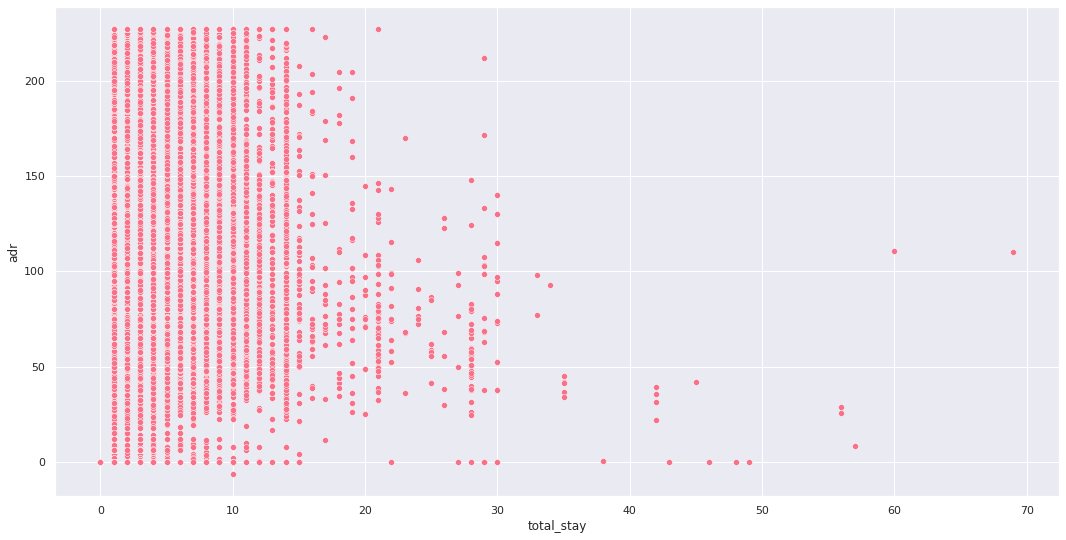

In [ ]:
# Chart - 8 visualization code
# Length of stay vs adr
plt.figure(figsize = (18,9))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

To understand the effect of total stay on adr, we have choosed scatterplot. However, we notice that there is an outliner in adr, we will remove for better scatterplot.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, it is clearly visible that length of total_stay increases, adr decreases. Customers who stay for less than 10 days pay more price when compared with the customers who stay for 30 days or more. For longer stay, the better deal for customers.

Answer Here

#### Chart - 9
  * Find top 10 countrys guest is comming

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Top 10 Countries by Guest')]

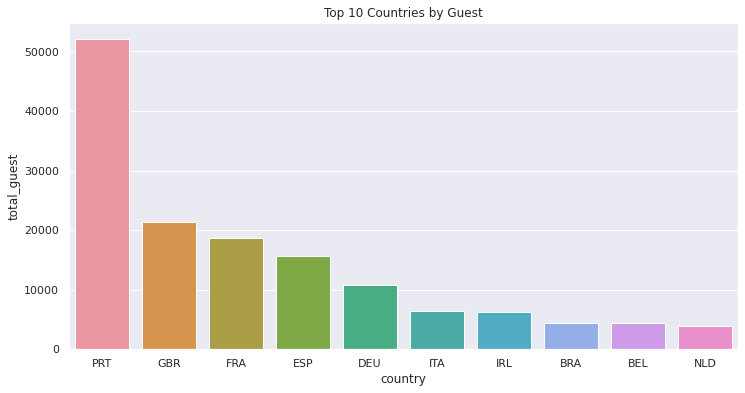

In [ ]:
# Chart - 9 visualization code
# top 10 country guest
guest_country_wise = pd.DataFrame(df[['country', 'total_guest']])
guest_country_wise_df = guest_country_wise.groupby(['country'])['total_guest'].sum()
guest_country_wise_df.sort_values(ascending = False, inplace = True)
top_10_country_by_guest = guest_country_wise_df.head(10)

plt.figure(figsize=(12,6))
sns.barplot(top_10_country_by_guest.index, top_10_country_by_guest).set(title='Top 10 Countries by Guest')

##### 1. Why did you pick the specific chart?

To know that which country guest is mostly coming, that why we choose bar plot

##### 2. What is/are the insight(s) found from the chart?

As we can see, that maximum guest is coming from Portugal

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can do more advertising & can provide attractive offers to Portugal guests to enhance the customer volume

#### Chart - 10
  * Find which agent have maximum no of booking

<AxesSubplot:xlabel='agent', ylabel='num_of_bookings'>

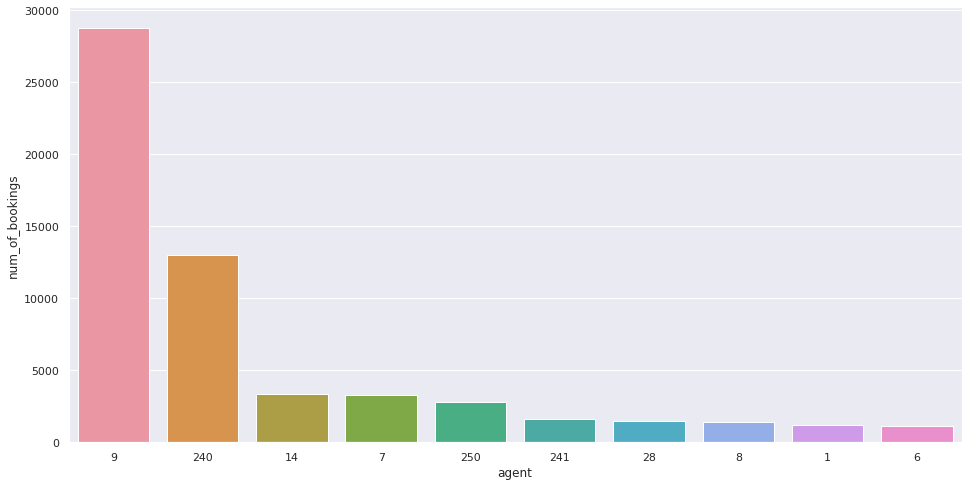

In [ ]:
# Chart - 10 visualization code
# To know which agent have maximum no of booking

df3 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns =  
                                                                    {'index':'agent','agent':'num_of_bookings'}
                                                                     ).sort_values(by = 'num_of_bookings', ascending = False)

df3.drop(df3[df3['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
df3 = df3[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (16,8))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = df3, order = df3.sort_values('num_of_bookings', ascending = False).agent)

##### 1. Why did you pick the specific chart?

To know which agent making most no. of bookings

##### 2. What is/are the insight(s) found from the chart?

Here we can clearly see that Agent no. 9 has made most no. of bookings.

#### Chart - 11
* Find which month has maximum number of bookig

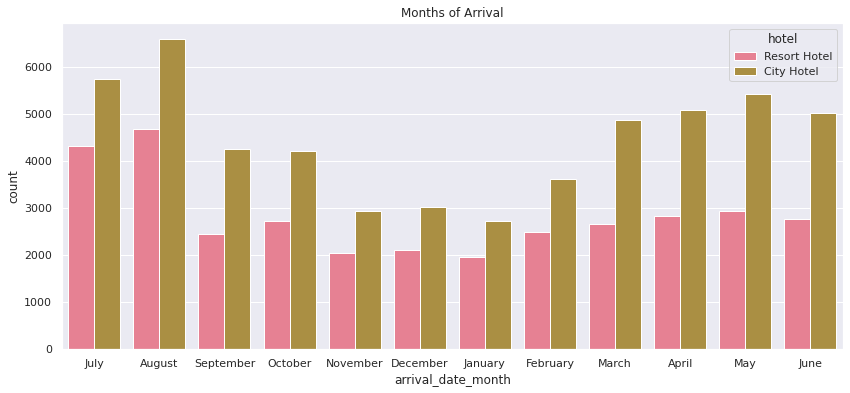

In [ ]:
# Chart - 11 visualization code
# To know about month wise booking
df['arrival_date_month'].value_counts()
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df)
plt.title('Months of Arrival')
plt.show()

##### 1. Why did you pick the specific chart?

For showing which months having higher hotel bookings, so we use bar plot

##### 2. What is/are the insight(s) found from the chart?

So here we can see that most no of booking is done in August month

#### Chart - 12
  * which type of hotel has longer waiting time

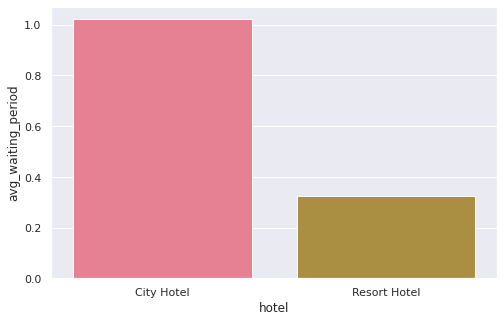

In [ ]:
# Chart - 12 visualization code
# Checking which type of hotel has longer waiting time

df12= pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {
    'days_in_waiting_list':'avg_waiting_period'}))

plt.figure(figsize = (8,5))
sns.barplot(x = df12['hotel'], y = df12['avg_waiting_period'] )
plt.show()

##### 1. Why did you pick the specific chart?

To know about the avg wating time hotel wise. so we use bar plot for batter understanding

##### 2. What is/are the insight(s) found from the chart?

We can see City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

#### Chart - 13
  * Find which type of hotel is preferred by guest for revisit 

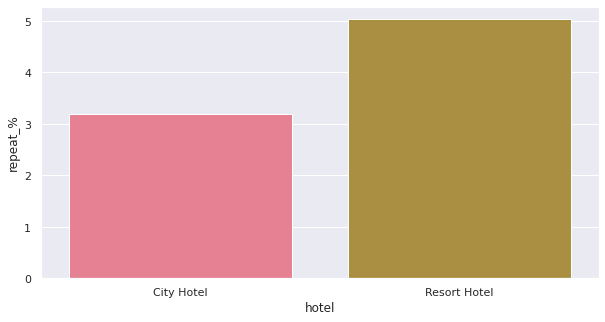

In [ ]:
# Chart - 13 visualization code
# know about Hotel Revisit Scenarios

# Selecting and counting repeated customers bookings
repeated_data = df[df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

##### 1. Why did you pick the specific chart?

We choose bar plot to understand the repeated guest or Revisit Scenarios

##### 2. What is/are the insight(s) found from the chart?

we can clearly see that Both hotels have very small percentage that customer will revisit, but Resort hotel has slightly higher revisit percentage than City Hotel.

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

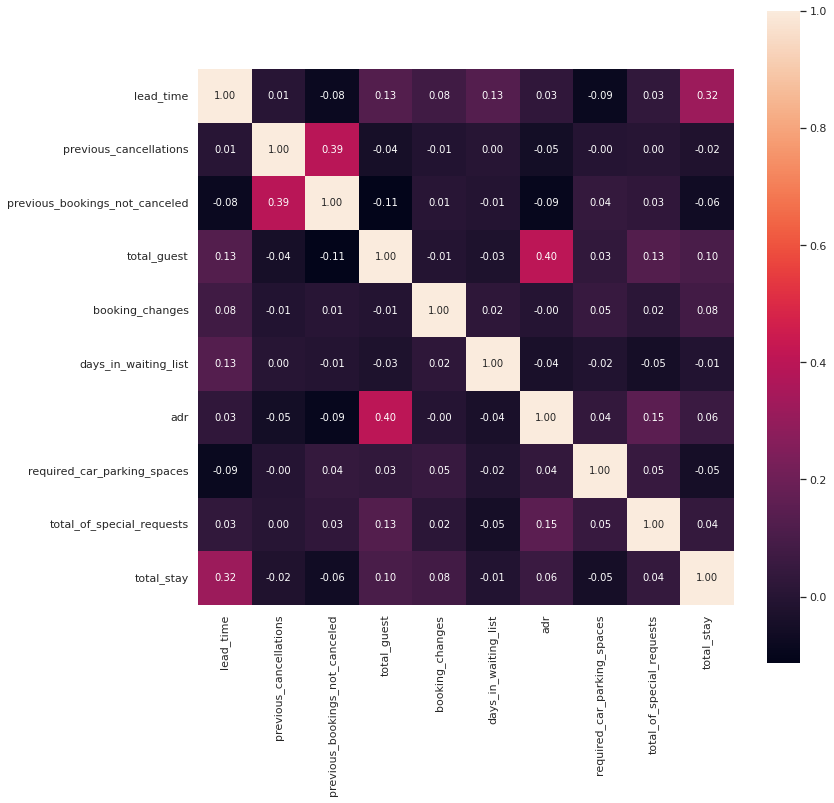

In [51]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
corr_df = df[['lead_time','previous_cancellations', 'previous_bookings_not_canceled', 'total_guest',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests','total_stay']].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_df, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True)

##### 1. Why did you pick the specific chart?

To understand the correlation between the variables.

##### 2. What is/are the insight(s) found from the chart?

Total stay and the lead time have positive correlation. This may be interpreted that for longer hotel stays, usually people plan in advance.

ADR is positively correlated with total_guest, which defines that as more number of people increases more revenue

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

* As the peak season is from May to August, with August as the highest booked month, management should consider to utilise staff effectively.
Increase room types A, H in order to increase adr and maximise profits

* As majority of the customers are from Portugal and western Europe, management should plan marketing activities in those regions respectively.

* Most preferred stay in hotels is 1 to 4 days, hotel management should introduce loyalty service, offers, tourism package in order to increase the stay of customers and to generate more revenue.

* As 30% of bookings from TA/To are cancelled, management should significantly take stpes to increase direct bookings by offering discounts, loyalty service, coupons on direct bookings in order to reduce cancellation and increase revenue.

* As the City Hotel has more bookings, it generates more revenue and it has more cancellations as well. Management may consider to provide customers with hourly booking option as most of the customers prefer short stay at City Hotel.

Answer Here.

# **Conclusion**

* Bread & Breakfast (BB) is the most preferred meal by the customers.

* Most of the bookings are for City Hotel (61%) comparedto Resort Hotel (39%)

* City Hotel is making more revenue than the Resort Hotel

* Most of the guest stays for 1-4 days in the hotels.

* Most preferred distribution channel by customers is Travel Agent / Tour Oprator (TA/TO) to make hotel booking. also Travel Agent / Tour Operator (TA/TO) has the highest booking cancellation percentage

* Room Type A is the most preferred room type among travellers, while booking, whereas room types H,G,C are generating more adr respectively.

* The length of the stay decreases as ADR increases probably to reduce the cost.

* Most number of bookings are made from Portugal & Great Britain.

* Most number of bookings are made in July and August as compared rest of the months.

* City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

*  Resort hotel has slightly higher revisit percentage than City Hotel.

* Lead time, number of days in waiting list or assignation of reserved room to customer does not affect cancellation of bookings.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***